# PRÁCTICA ML-101
## Parte 2. Problema de Regresión
### Análisis Exploratorio

Cargamos las librerías y funciones necesarias

In [139]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

Cargamos los datos del fichero

In [140]:
diamonds = pd.read_csv("diamonds.csv", sep = ',', decimal = '.')
diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


La primera columna, que creo que hace referencia la número de registro, no aporta información, por lo que la borramos directamente

In [141]:
diamonds = diamonds.drop(diamonds.columns[[0]], axis = 1)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [142]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [336]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [143]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Codificamos variables categóricas

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

diamonds['cut'] = le.fit_transform(diamonds['cut'])
list(le.classes_)

['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [145]:
diamonds['color'] = le.fit_transform(diamonds['color'])
list(le.classes_)

['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [146]:
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])
list(le.classes_)

['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

In [147]:
diamonds.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [148]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Comprobamos correlación entre características

In [149]:
diamonds.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


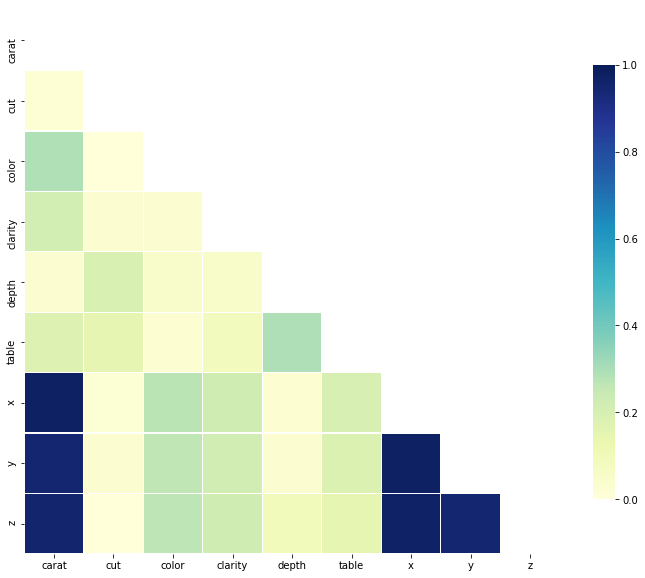

In [150]:
# Reperesentamos el mapa de correlación entre variables

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(diamonds.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Vemos que hay una fuerte correlacion entre el peso del diamante y sus dimensiones (x,y,z), por lo que eliminaremos estas últimas de nuestro Data Frame

In [151]:
diamonds = diamonds.drop(['x', 'y', 'z'], axis = 1)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335


Representaremos un histograma de algunas variables, para ver su distribución

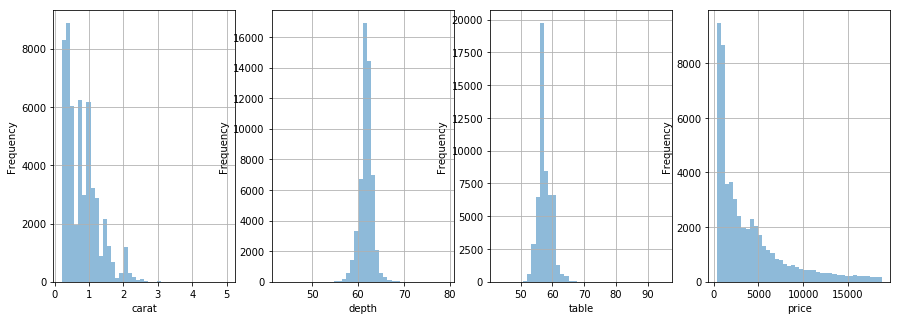

In [162]:
plt.figure(figsize=(15, 5))

plt.subplot(1,4,1)
diamonds['carat'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('carat')

plt.subplot(1,4,2)
diamonds['depth'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('depth')

plt.subplot(1,4,3)
diamonds['table'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('table')

plt.subplot(1,4,4)
diamonds['price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('price')

plt.show()

Observamos que tanto el peso (carat) como el precio están bastante sesgadas, por lo que aplicaremos una función logarítmica

In [163]:
# Transformamos variables Peso y Precio

for feature in ['price','carat']:
    diamonds[feature] = diamonds[feature].apply(lambda x: np.log10(x))

Volvemos a representarlas para comprobar su resultado

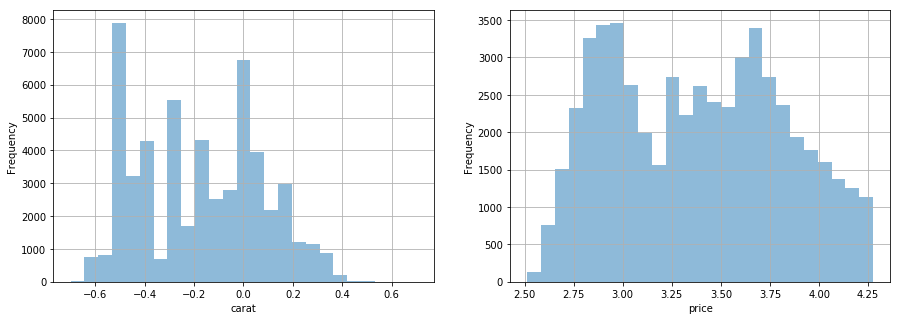

In [164]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
diamonds['carat'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('carat')

plt.subplot(1,2,2)
diamonds['price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('price')

plt.show()

Preparamos los datos de Entrenamiento y Test

In [167]:
# Preparamos los datos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = diamonds.columns.drop('price')

X = diamonds[features].as_matrix()
y = diamonds['price'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.25, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

Datos train:  (40455, 6)
Datos test:   (13485, 6)
Propocion train:3.381
Propocion test: 3.383


Veamos si podemos ajustar un poco más los datos a introducir en el modelo. Vamos a usar un método Embeded (Lasso) para selección de características

best mean cross-validation score: -0.008
best parameters: {'alpha': 0.001}


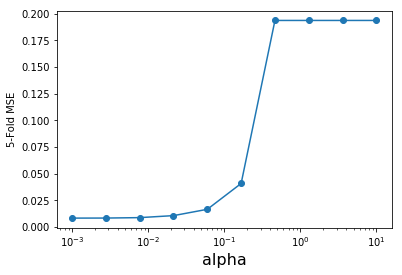

In [221]:
# Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-3,1,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1 * np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

Comprobamos si podemos optimizar alpha para ver si se "desactiva" alguna variable

In [228]:
# Resultados Lasso

from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(Xs_train,y_train)

ytrainLasso = lasso.predict(Xs_train)
ytestLasso  = lasso.predict(Xs_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
feature_names = diamonds.columns
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Lasso (train): 0.00909
MSE Modelo Lasso (test) : 0.00901
carat 0.432615333822
cut 0.0
color -0.0333296253922
clarity 0.0375144079995
depth -0.0
table -0.0


Parece que sí, que podemos ajustar el modelo sin tener en cuenta las tres variables que se han desactivado (corte, profundidad y ancho de punta)

De hecho, si nos fijamos bien en las cifras, parece que carat es la que más le afecta al precio. Comprobamos con un scatterplot

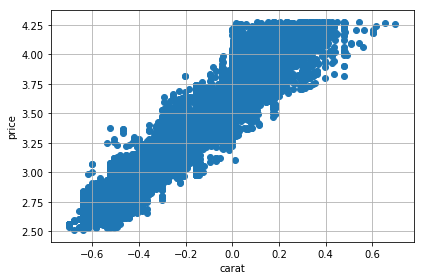

In [244]:
plt.scatter(diamonds['carat'], diamonds['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.grid()
plt.tight_layout()

Efectivamente, parece que a medida que aumenta el peso, aumenta el precio. Probaremos una Regresión sólo con esta variable, y luego compararemos con otra Regresión en la que añadiremos color y claridad

In [273]:
# Preparamos los datos

X = diamonds['carat'].as_matrix().reshape(-1, 1)
y = diamonds['price'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.25, random_state=0)

# Escalamos
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

Datos train:  (40455, 1)
Datos test:   (13485, 1)
Propocion train:3.381
Propocion test: 3.383


In [274]:
# Regresion Lineal

from sklearn.linear_model import LinearRegression

# Ajustamos el modelo
lr = LinearRegression().fit(Xs_train,y_train)

# Hacemos prediccion
y_pred = lr.predict(Xs_test)

# Coeficientes obtenidos
print('Coefficients: \n', lr.coef_)

# Score obtenido
print("Train: {:.3f}".format(lr.score(Xs_train, y_train)))
print("Test: {:.3f}".format(lr.score(Xs_test, y_test)))

Coefficients: 
 [ 0.42514082]
Train: 0.933
Test: 0.934


In [275]:
y_pred_train = lr.predict(Xs_train)
y_pred_test = lr.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.01304 
MSE Test: 0.01294 


El resultado es bastante bueno. Ahora probemos con las otras dos variables que parecían afectar al precio

In [276]:
# Preparamos los datos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = diamonds.columns.drop(['price', 'cut', 'depth', 'table'])

X = diamonds[features].as_matrix()
y = diamonds['price'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.25, random_state=0)

# Escalamos
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

Datos train:  (40455, 3)
Datos test:   (13485, 3)
Propocion train:3.381
Propocion test: 3.383


In [277]:
# Regresion Lineal

from sklearn.linear_model import LinearRegression

# Ajustamos el modelo
lr = LinearRegression().fit(Xs_train,y_train)

# Hacemos prediccion
y_pred = lr.predict(Xs_test)

# Coeficientes obtenidos
print('Coefficients: \n', lr.coef_)

# Score obtenido
print("Train: {:.3f}".format(lr.score(Xs_train, y_train)))
print("Test: {:.3f}".format(lr.score(Xs_test, y_test)))

Coefficients: 
 [ 0.44944324 -0.04733042  0.05107799]
Train: 0.955
Test: 0.956


In [278]:
y_pred_train = lr.predict(Xs_train)
y_pred_test = lr.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00864 
MSE Test: 0.00852 


Hemos obtenido unas prestaciones superiores usando las tres variables. Lo mantenemos así

De todas formas, probaremos con otros métodos para ver si se puede mejorar

### Árbol de Decisión

Optimizamos la complejidad (max_depth) del Árbol con Validación Cruzada

best mean cross-validation score: -0.003
best parameters: {'max_depth': 13}


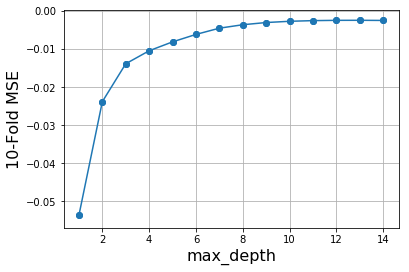

In [256]:
# Arbol de Decision para Regresion

from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeRegressor(random_state=0),
                    scoring='neg_mean_squared_error', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE',fontsize=16)
plt.grid()
plt.show()

Comprobamos sus métricas

In [258]:
depthOpt = grid.best_params_['max_depth']

tree = DecisionTreeRegressor(random_state=0, max_depth= depthOpt).fit(Xs_train,y_train)

print("Train: {:.3f}".format(tree.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(tree.score(Xs_test, y_test)))

acc (train): 0.955
Train: 0.990
Test: 0.987 


Hemos mejorado bastante, aunque el valor tan alto del parámetro libre max_depth nos puede llevar a overfitting. Intentemos ajustarlo, con max_depth = 8

In [262]:
tree = DecisionTreeRegressor(random_state=0, max_depth= 8).fit(Xs_train,y_train)

print("Train: {:.3f}".format(tree.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(tree.score(Xs_test, y_test)))

acc (train): 0.955
Train: 0.982
Test: 0.981 


Parece que con una profundidad de 8, no perdemos prestaciones, y además, los scores de Train y Test, aunque algo más bajos, quedan más ajustados, con lo que controlaremos mejor el riesgo de overfitting

In [271]:
y_pred_train = tree.predict(Xs_train)
y_pred_test = tree.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00353 
MSE Test: 0.00369 


Como vemos, hemos logrado superar claramente las prestaciones de la Regresión obtenida anteriormente

### Random Forest

Tratamos de optimizar un algoritmo de Random Forest para nuestro problema

best mean cross-validation score: -0.002
best parameters: {'max_depth': 12}


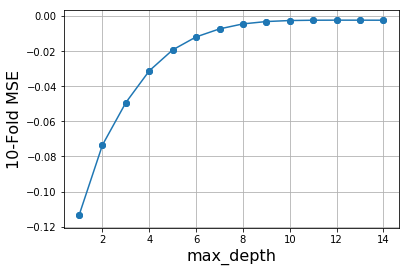

In [281]:
# Optimización Random Forest

from sklearn.ensemble import RandomForestRegressor

maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators = 200, max_features='sqrt'),
                    scoring='neg_mean_squared_error', 
                    param_grid=param_grid, 
                    cv = 10)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE',fontsize=16)
plt.grid()
plt.show()

Comprobamos sus métricas

In [324]:
depthOpt = grid.best_params_['max_depth']

rf = RandomForestRegressor(random_state=0,
                            max_depth=depthOpt,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: {:.3f}".format(rf.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(rf.score(Xs_test, y_test)))

Train: 0.989
Test: 0.988 


In [325]:
y_pred_train = rf.predict(Xs_train)
y_pred_test = rf.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00204 
MSE Test: 0.00234 


El valor tan alto del parámetro libre (max_depth=12) nos puede llevar a overfitting. Intentemos ajustarlo

In [314]:
rf = RandomForestRegressor(random_state=0,
                            max_depth=8,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: {:.3f}".format(rf.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(rf.score(Xs_test, y_test)))

Train: 0.977
Test: 0.977 


In [315]:
y_pred_train = rf.predict(Xs_train)
y_pred_test = rf.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00443 
MSE Test: 0.00448 


In [316]:
rf = RandomForestRegressor(random_state=0,
                            max_depth=9,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: {:.3f}".format(rf.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(rf.score(Xs_test, y_test)))

Train: 0.984
Test: 0.984 


In [317]:
y_pred_train = rf.predict(Xs_train)
y_pred_test = rf.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00304 
MSE Test: 0.00313 


In [318]:
rf = RandomForestRegressor(random_state=0,
                            max_depth=10,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: {:.3f}".format(rf.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(rf.score(Xs_test, y_test)))

Train: 0.988
Test: 0.987 


In [319]:
y_pred_train = rf.predict(Xs_train)
y_pred_test = rf.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00241 
MSE Test: 0.00257 


In [322]:
rf = RandomForestRegressor(random_state=0,
                            max_depth=11,
                            n_estimators = 200,
                            max_features='sqrt').fit(Xs_train,y_train)

print("Train: {:.3f}".format(rf.score(Xs_train, y_train)))
print("Test: {:.3f} ".format(rf.score(Xs_test, y_test)))

Train: 0.989
Test: 0.988 


In [323]:
y_pred_train = rf.predict(Xs_train)
y_pred_test = rf.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00216 
MSE Test: 0.00238 


Parece que no conseguimos bajar mucho la complejidad, sin generar más error, y perdiendo prestaciones

### Boosted Trees

Para la búsqueda de parámetros libres optimizados, fijamos la complejidad (maz_depth = 3), y barremos sobre los otros dos parámetros (número de iteraciones y tasa de aprendizaje)

In [328]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
learningRate = [0.1,0.05]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.988
best parameters: {'learning_rate': 0.1, 'n_estimators': 1500}


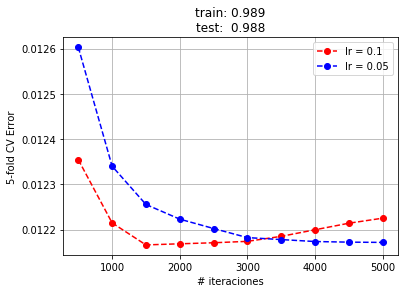

In [330]:
# calculamos métricas globales
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 1500)
bt.fit(Xs_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

In [331]:
y_pred_train = bt.predict(Xs_train)
y_pred_test = bt.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00221 
MSE Test: 0.00227 


Pese a los resultados de la validación cruzada, por el gráfico, parece que la curva que representa la tasa de aprendizaje de 0.05 tiene un mejor comportamiento (más estable). Probemos con dicha tasa.

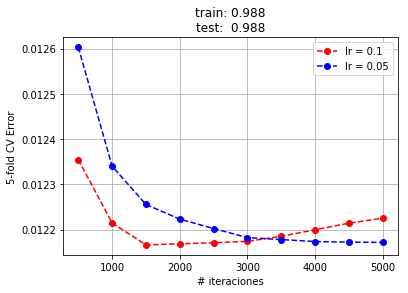

In [332]:
# calculamos métricas globales
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= 0.05, n_estimators= 1500)
bt.fit(Xs_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

In [333]:
y_pred_train = bt.predict(Xs_train)
y_pred_test = bt.predict(Xs_test)
print("MSE Train: {:.5f} ".format(np.mean(np.power(y_train - y_pred_train,2))))
print("MSE Test: {:.5f} ".format(np.mean(np.power(y_test - y_pred_test,2))))

MSE Train: 0.00227 
MSE Test: 0.00228 


No obtenemos mejores prestaciones que con la tasa obtenida, aunque los errores de Test y Entrenamiento se ajustan más

En definitiva, como en el caso de la clasificación, el algoritmo que más prestaciones nos ha dado ha sido boosted tree